In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('weight-height-female.csv')

In [3]:
df.head()

,Unnamed: 0,Gender,Height,Weight
0,5000,Female,58.910732,102.088326
1,5001,Female,65.230013,141.305823
2,5002,Female,63.369004,131.041403
3,5003,Female,64.479997,128.171511
4,5004,Female,61.793096,129.781407


In [4]:
X = df[["Height"]]
Y = df[["Weight"]]

In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42
)

# Check shapes
print('Train shape:', X_train.shape, y_train.shape)
print('Test shape:', X_test.shape, y_test.shape)

Train shape: (4000, 1) (4000, 1)
Test shape: (1000, 1) (1000, 1)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


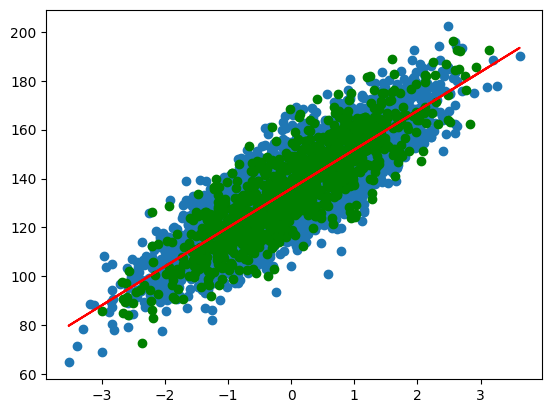

In [8]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, linreg.predict(X_test), c="r")
plt.plot(X_train, linreg.predict(X_train), c="r")

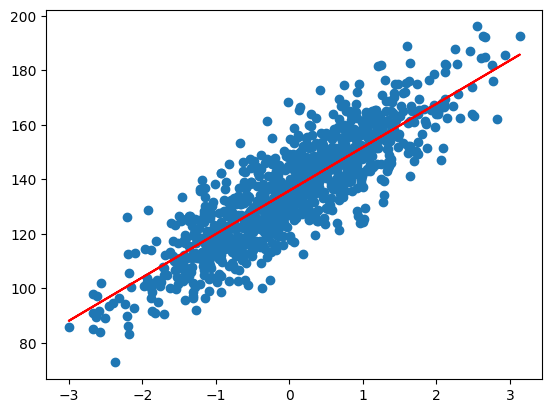

In [9]:
plt.scatter(X_test, y_test)
plt.plot(X_test, linreg.predict(X_test), c="r")

In [10]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_score(y_test, linreg.predict(X_test)), mean_absolute_error(y_test, linreg.predict(X_test)), np.sqrt(mean_squared_error(y_test, linreg.predict(X_test)))

(0.7386737234732358, 7.986767601161029, np.float64(10.134874510219753))

In [11]:
scaled_height = scaler.transform([[100]])
scaled_height

d:\Study\projects\unnamed\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[13.55005364]])

In [12]:
linreg.predict(scaled_height)

array([[351.70884607]])

In [13]:
y_pred_test = linreg.predict(X_test)
residuals = y_test - y_pred_test

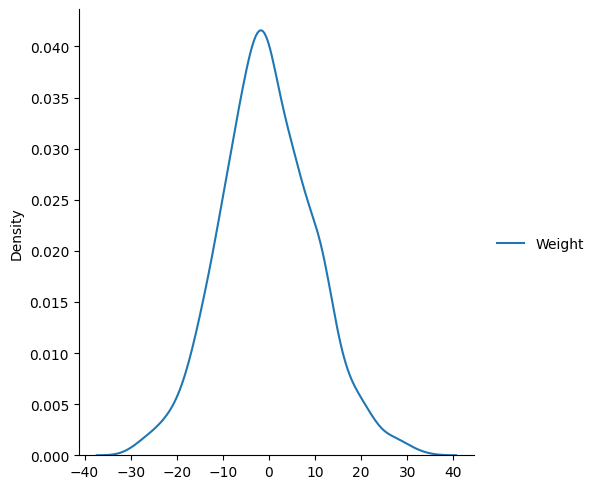

In [14]:
sns.displot(residuals, kind='kde')